# Linear Regression

In [90]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
#Loading the dataset
dfx=pd.read_csv("./linearX-Copy1.csv")
dfy=pd.read_csv("./linearY-Copy1.csv")

In [92]:
#Converting dataframes into numpy array
X=dfx.values
y=dfy.values

#Printing shape of data
print(X.shape)
print(y.shape)

(99, 1)
(99, 1)


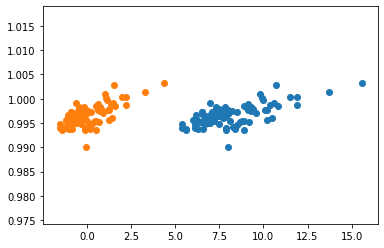

In [93]:
#Visualising the data
plt.scatter(X,y)
#Preprocessing(normalisation)
X1=(X-X.mean())/X.std()
Y1=y
plt.scatter(X1,Y1)
plt.show()


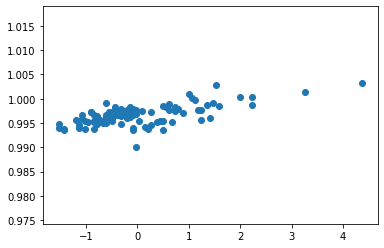

In [94]:
plt.scatter(X1,Y1)
plt.show()

In [95]:
#Hypothesis function for approximation line
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [96]:
#Error function

def error(X1,Y1,theta):
    
    m=X1.shape[0]
    error=0
    
    for i in range(m):
        hx=hypothesis(X1[i],theta)
        error+=(hx-Y1[i])**2
        
    return error

In [97]:
#Gradient w.r.t to theta[0] and theta[1]

def gradient(X1,Y1,theta):
    
    grad=np.zeros((2,))
    m=X1.shape[0]
    
    for i in range(m):
        hx=hypothesis(X1[i],theta)
        grad[0]+=(hx-Y1[i])
        grad[1]+=(hx-Y1[i])*X1[i]
    return grad


In [98]:
#Gradient Descent (updating theta)

def gradientDescent(X1,Y1,learning_rate=0.001):
    
    theta=np.array([-2.0,0.0])
    itr=0
    max_itr=100
    error_list=[]
    theta_list=[]
    
    while(itr<max_itr):
        grad=gradient(X1,Y1,theta)
        err=error(X1,Y1,theta)
        error_list.append(err)
        theta_list.append((theta[0],theta[1]))
        
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        itr+=1
    return theta,error_list,theta_list

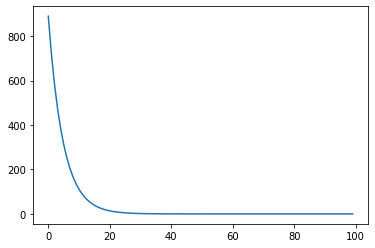

[0.9965452 0.0013579]


In [99]:
#Function call
final_theta,error_list,theta_list=gradientDescent(X1,Y1)
plt.plot(error_list)
plt.show()
print(final_theta)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


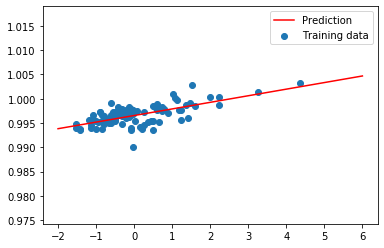

In [100]:
#Plot for testing data

xtest=np.linspace(-2,6,10)
print(xtest)

plt.scatter(X1,Y1,label='Training data')
plt.plot(xtest,hypothesis(xtest,final_theta),label='Prediction',color='red')
plt.legend()
plt.show()

# Visualisation of surface plot and contour in 2D and 3D

In [101]:
#Import libraries
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [102]:
#Meshgrid for theta0 and theta1
T0=np.arange(-2,3,0.01)
T1=np.arange(-2,3,0.01)
T0,T1=np.meshgrid(T0,T1)
J=np.zeros(T0.shape)

m=T0.shape[0]
n=T0.shape[1]

for i in range(m):
    for j in range(n):
        J[i,j]=np.sum((Y1-T1[i,j]*X1-T0[i,j])**2)
print(J.shape)

(500, 500)


In [103]:
theta_list=np.array(theta_list)

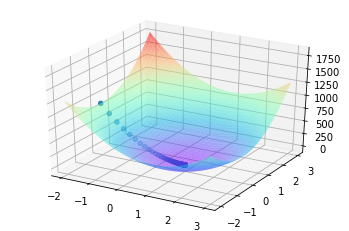

In [104]:
#Surface plot
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=0.5)
plt.show()

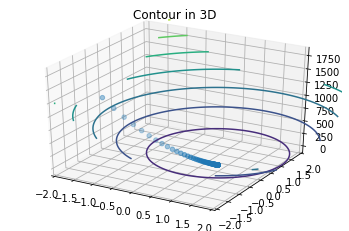

In [105]:
#Contour plot
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)

axes.set_xlim([-2,2])
axes.set_ylim([-2,2])

axes.contour(T0,T1,J)
plt.title('Contour in 3D')
plt.show()


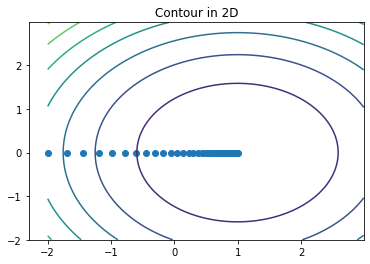

In [106]:
#Contour in 2D
plt.contour(T0,T1,J)
plt.scatter(theta_list[:,0],theta_list[:,1])

plt.title('Contour in 2D')
plt.show()